<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/implementation_of_kmeans_plusplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the Fuzzy c-means library
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Descripción**


El presente proyecto tiene como objetivo validar método `k-means ++` como generador de semilla de centroides para diferentes algoritmos de segmentación como el Fuzzy y Kmeans, empleando un conjunto de datos dummy, pero aplicable a datos reales. 

In [ ]:
# Models
from sklearn.cluster import KMeans
from fcmeans import FCM
# Generator of data
from sklearn.datasets import make_blobs
# Select  cluster centers of the k-mean 
from sklearn.cluster import kmeans_plusplus
# graphics and colors
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')


**Objective**: Select the initial cluster centers of the k-mean clustering for others models.

In [ ]:
# Generate sample data
n_samples = 5000
# Generate centers number 
n_clusters = 5
# Generate seed
random_state = 198

In [ ]:
def generate_data(n_features:int=2, n_samples:int=500, n_components:int=3,
                  cluster_std:float=0.60, random_state:int=8)->tuple:
  """data generator"""
  X, y = make_blobs(
      n_samples=n_samples, centers=n_components, cluster_std = 0.60,
      random_state=random_state
  )
  return X, y


def generate_colors(paleta="Set1", n_colors=15):
  """Colors generator"""
  cmap = sns.color_palette(paleta, n_colors).as_hex()
  list_camap = ListedColormap(cmap)
  return cmap, list_camap

In [ ]:
X, y = generate_data(n_samples=n_samples,n_components=n_clusters, random_state=random_state)

In [ ]:
centers_init, indices = kmeans_plusplus(X, n_clusters=n_clusters, random_state=random_state)

In [ ]:
# n_clusters: n of clusters
# y: reference of cluster
#
def scater_center(n_clusters, y, cluster_center, title):
  colorss, _ = generate_colors(n_colors=n_clusters)
  for i, col in enumerate(colorss):
    cluster_data = (y == i)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

  plt.scatter(cluster_center[:, 0], cluster_center[:, 1], c="b", s=50)
  plt.title(f"K-Means++ Initialization {title}")
  plt.show()


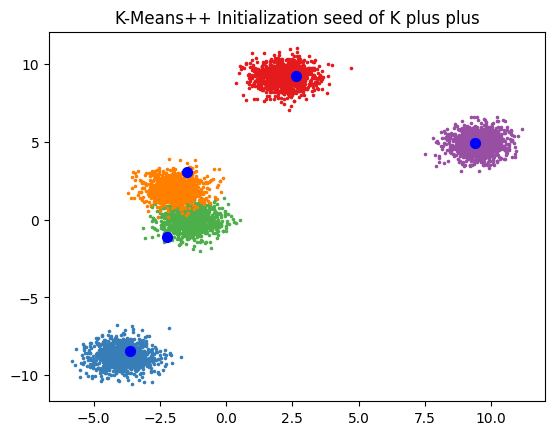

In [ ]:
scater_center(n_clusters, y, centers_init, title='seed of K plus plus')

In [ ]:
# Implement a kmeans model
model = KMeans(n_clusters=n_clusters)
model.fit(X)

KMeans(n_clusters=5)

In [ ]:
centers_init_kmeans = model.cluster_centers_

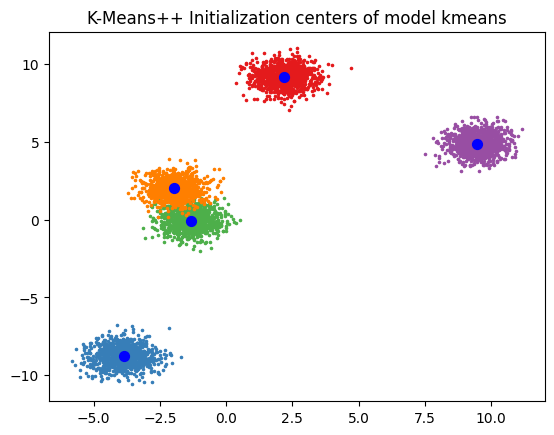

In [ ]:
#Coordinates of kmeans 
scater_center(n_clusters, y, centers_init_kmeans, title = "centers of model kmeans") 

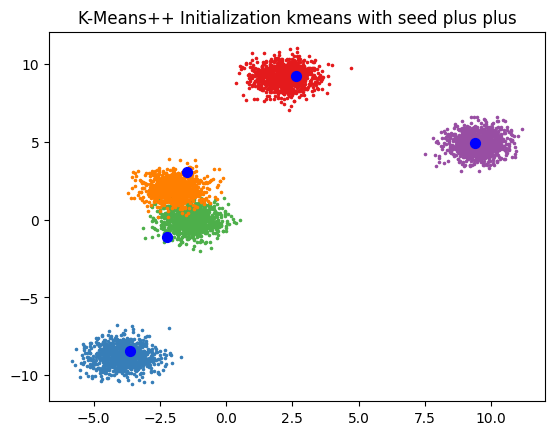

In [ ]:
# replace of seed of coordinates of centers
model.cluster_centers_ =  centers_init
centers_init_kmeans = model.cluster_centers_
scater_center(n_clusters, y, centers_init_kmeans, title = "kmeans with seed plus plus") 

In [ ]:
# instance model fuzy
fcm = FCM(n_clusters=n_clusters)
fcm.fit(X)

In [ ]:
#dir(fcm)

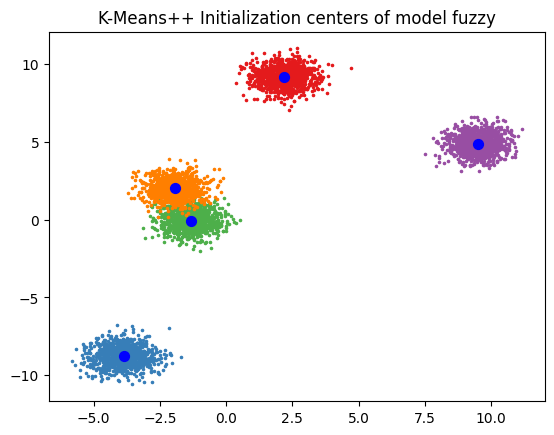

In [ ]:
centers_init_fuzzy = fcm.centers
scater_center(n_clusters, y, centers_init_fuzzy, title= "centers of model fuzzy") 

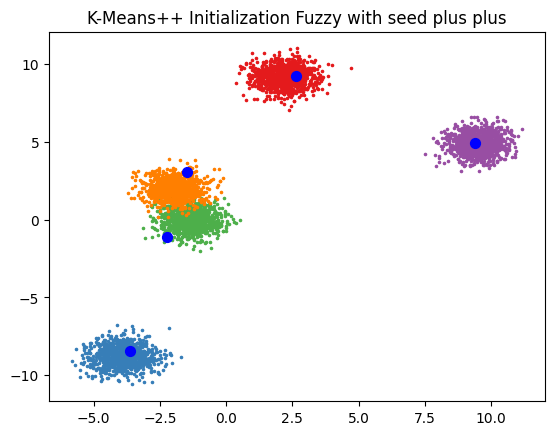

In [ ]:
# always find the attribute that contains centers  coordinates 

fcm._centers = centers_init
centers_init_fuzzy = fcm.centers
scater_center(n_clusters, y, centers_init_fuzzy, title= "Fuzzy with seed plus plus") 